In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import *
from sklearn.metrics import *
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import *
from matplotlib.pyplot import MultipleLocator
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.linear_model import Lasso, LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, GradientBoostingClassifier,AdaBoostRegressor
from sklearn.ensemble import *

In [ ]:
dataFrame = pd.read_excel('/content/drive/MyDrive/DataMining/final/RandomForestFeatureSelectionOfDatastd.xlsx')
dataArray = np.array(dataFrame)
X = dataArray[:92,5:]
y = dataArray[:92,3].astype(float)
dataFrame

,姓名,性别,年龄,HAMD评分,分类,"FP2-A2 δ 节律,µV","FP2-A2 θ 节律, µV","FP2-A2 α 节律, µV","FP2-A2 β(LF)节律, µV","F4-A2 α 节律, µV","FZ-A2 δ 节律,µV","FZ-A2 θ 节律, µV","C4-A2 δ 节律,µV","C4-A2 θ 节律, µV","PZ-A2 θ 节律, µV","O1-A1 δ 节律,µV","O1-A1 α 节律, µV","O1-A1 β(LF)节律, µV","O2-A2 α 节律, µV","O2-A2 β(LF)节律, µV","F7-A1 β(LF)节律, µV","F8-A2 δ 节律,µV","F8-A2 θ 节律, µV","F8-A2 α 节律, µV","T3-A1 δ 节律,µV","T3-A1 β(LF)节律, µV","T4-A2 δ 节律,µV","T4-A2 θ 节律, µV","T4-A2 α 节律, µV","T4-A2 β(LF)节律, µV","T5-A1 β(LF)节律, µV"
0,NM1,男,67,18.0,0.0,-0.132964,-0.569415,0.268507,0.670583,-0.154677,-0.034830,-0.171939,0.091999,-0.102946,2.366042,0.013699,-0.012541,-0.038182,1.257974,0.111732,0.039578,-0.736283,-0.933075,2.851818,-0.207832,0.251755,0.523304,-0.437023,1.403749,-0.082794,2.073247
1,NM2,男,48,16.0,1.0,-0.132964,-0.617097,-0.405903,-0.476100,1.097537,0.665726,0.846657,-0.020853,0.729316,-1.083122,0.335931,0.184366,-0.336840,-0.875833,0.245768,-0.092715,-0.949491,0.803239,0.402197,0.852220,0.192836,-0.040124,-0.397070,0.469518,-0.041842,-0.234335
2,NM3,女,31,16.0,1.0,0.578029,1.467271,0.576809,0.856531,0.962683,0.724105,-1.221559,0.919579,0.690606,-1.162718,-0.287051,-1.131805,-0.315507,0.892179,-1.362657,0.568752,0.502990,0.304511,0.488149,-1.129186,0.939135,0.775876,0.182250,1.644841,0.101489,0.695108
3,NM4,男,45,20.0,0.0,-0.269694,-1.141595,-0.271021,-0.662049,-0.617033,-0.677007,2.092758,-0.340600,-0.606174,2.397880,-0.115194,2.448803,0.004483,-1.089214,1.471943,-0.470696,-1.355919,-0.822246,-0.822613,1.669550,-0.690938,-0.914410,-0.536906,-1.398944,-0.082794,-1.035578
4,NM5,男,42,13.0,1.0,-0.269694,3.102070,-0.425171,0.050754,-1.079389,-0.677007,-0.549389,-0.904859,-1.767469,-1.194557,-0.738177,-0.354539,-0.742161,-0.449071,-1.764763,-0.735283,1.229230,-0.415875,-0.006073,-0.648695,-0.278510,1.630733,-0.796601,-0.344167,-0.389931,-0.426633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,NM87,女,68,NaN,NaN,1.015563,0.486392,0.075819,0.918514,1.232390,1.521960,-0.518365,0.468172,1.019640,-0.716980,0.271485,-0.302721,0.196477,0.526383,-0.761980,0.776642,0.203166,0.987954,-0.263928,0.465846,0.232115,-0.486981,1.380842,0.107880,0.101489,-0.042036
134,NM88,女,52,NaN,NaN,-0.173983,-0.903187,-0.733473,-0.383126,-0.328060,-0.112670,0.722564,-0.002044,-0.412625,2.047657,0.185556,-0.033269,-0.571500,1.044594,1.213801,-0.395100,-1.002793,-0.046446,-0.994516,0.718475,-0.435625,0.484447,0.002461,-0.555123,-0.041842,1.207904
135,NM89,女,53,NaN,NaN,-0.091946,-0.433182,0.268507,-0.538083,-0.000558,-0.015370,1.658432,0.881962,-0.431980,0.726362,0.078145,2.080896,1.519104,-1.180663,0.821623,0.323064,-1.229327,0.119797,-0.543270,1.283176,1.214087,-1.108696,0.222203,0.198289,1.186708,-1.227877
136,NM91,男,25,NaN,NaN,-0.953341,-1.189277,-1.157388,-0.817006,-1.272037,-0.949445,0.774270,-0.020853,-0.896498,1.946836,-0.179641,1.417629,0.047148,-0.967282,1.869085,-0.565191,-0.183274,-1.154732,-1.381298,0.787824,-0.298149,-0.642410,-0.516929,-1.338671,-0.226124,1.111755


In [ ]:
param_dict_1 = [
  {
    'n_estimators':[50,150,300],
    'learning_rate':[0.1,0.5,1.5],
  },
]
best_Adaboost = GridSearchCV(AdaBoostRegressor(DecisionTreeRegressor(ccp_alpha=0.5)),param_dict_1,cv=10,scoring='r2')

In [ ]:
pred_y = cross_val_predict(best_Adaboost,X,y,cv=10)
print('Mean squared error: %.2f'
    % mean_squared_error(y, pred_y))
print('Coefficient of determination: %.2f'
    % r2_score(y, pred_y))

In [ ]:
param_dict_2 = [
  {
    'n_estimators':[50,150,200],
    'learning_rate':[0.1,0.5,1],
  },
]

best_GBDT = GridSearchCV(GradientBoostingRegressor(max_depth=5),param_dict_2,cv=10,scoring='r2')

In [ ]:
pred_y = cross_val_predict(best_GBDT,X,y,cv=10)
print('Mean squared error: %.2f'
    % mean_squared_error(y, pred_y))
print('Coefficient of determination: %.2f'
    % r2_score(y, pred_y))

In [ ]:
param_dict_3 = [
  {
    'n_estimators':[100,200,300],
    'max_depth':[2,3,4],
  },
]

best_RandomForest = GridSearchCV(RandomForestRegressor(ccp_alpha=0.5,warm_start=True),param_dict_3,cv=10,scoring='r2')

In [ ]:
pred_y = cross_val_predict(best_RandomForest,X,y,cv=10)
print('Mean squared error: %.2f'
    % mean_squared_error(y, pred_y))
print('Coefficient of determination: %.2f'
    % r2_score(y, pred_y))

In [ ]:
# Train classifiers
reg1 = best_Adaboost
reg2 = best_GBDT
reg3 = best_RandomForest
reg4 = LinearRegression()

reg1.fit(X, y)
reg2.fit(X, y)
reg3.fit(X, y)
reg4.fit(X, y)

ereg = VotingRegressor([('adb', reg1), ('gbdt', reg2), ('rf', reg3), ('lr', reg4)])
ereg.fit(X, y)

In [ ]:
pred1=reg1.predict(X)
pred2=reg2.predict(X)
pred3=reg3.predict(X)
pred4=reg4.predict(X)
pred5=ereg.predict(X)

In [ ]:
plt.figure()
plt.plot(y, 'ko', label = 'Origin')
plt.plot(pred1, 'gd', label='AdaBoost')
plt.plot(pred2, 'b^', label='GradientBoosting')
plt.plot(pred3, 'ys', label='RandomForest')
plt.plot(pred4, 'r*', ms=10, label='LogisticRegression')
plt.plot(pred5, 'cx', ms=10, label='VotingRegressor')


plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Regressor predictions and their average')
x_major_locator=MultipleLocator(2)
y_major_locator=MultipleLocator(2)
ax=plt.gca()
ax.yaxis.set_major_locator(x_major_locator)
plt.show()

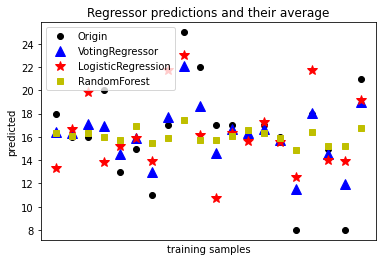

In [ ]:
plt.figure()
plt.plot(y[:20], 'ko', label = 'Origin')
plt.plot(pred5[:20], 'b^', ms=10, label='VotingRegressor')
plt.plot(pred4[:20], 'r*', ms=10, label='LogisticRegression')
plt.plot(pred3[:20], 'ys', label='RandomForest')


plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Regressor predictions and their average')
x_major_locator=MultipleLocator(2)
y_major_locator=MultipleLocator(2)
ax=plt.gca()
ax.yaxis.set_major_locator(x_major_locator)
plt.show()

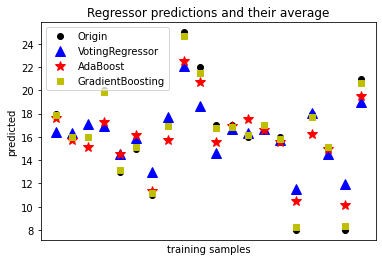

In [ ]:
plt.figure()
plt.plot(y[:20], 'ko', label = 'Origin')
plt.plot(pred5[:20], 'b^', ms=10, label='VotingRegressor')
plt.plot(pred1[:20], 'r*', ms=10, label='AdaBoost')
plt.plot(pred2[:20], 'ys', label='GradientBoosting')


plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Regressor predictions and their average')
x_major_locator=MultipleLocator(2)
y_major_locator=MultipleLocator(2)
ax=plt.gca()
ax.yaxis.set_major_locator(x_major_locator)
plt.show()

In [ ]:
pred_y = cross_val_predict(ereg,X,y,cv=10)
print('Mean squared error: %.2f'
    % mean_squared_error(y, pred_y))
print('Coefficient of determination: %.2f'
    % r2_score(y, pred_y))